<a href="https://colab.research.google.com/github/SohelRaja/Customer-Churn-Analysis/blob/master/Ensemble%20Learning/Other%20Classifiers/Random%20Forest/Random_Forest_Classifier_Customer_Churn_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Analysis with Random Forest Classifier #

### Importing Required Libraries ###

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

### Importing Dataset From Github Repository ###

In [3]:
url = 'https://raw.githubusercontent.com/SohelRaja/Customer-Churn-Analysis/master/Decision%20Tree/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url)
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Data Analysis ###

In [4]:
telco_arr = np.array(telco.columns)
telco_arr

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
def unique_value_check():
    len_col_telco = len(telco_arr)
    print("Column Name : No. of unique value")
    print("---------------------------------")
    for i in range(1,len_col_telco):
        val = len(np.unique(telco[telco_arr[i]]))
        print(i," : ",telco_arr[i],":",val,end='\t')
        if(val<10):
            print("---> ",telco[telco_arr[i]].unique().tolist())
        else:
            print("---> [Too Much Values]")
unique_value_check()

Column Name : No. of unique value
---------------------------------
1  :  gender : 2	--->  ['Female', 'Male']
2  :  SeniorCitizen : 2	--->  [0, 1]
3  :  Partner : 2	--->  ['Yes', 'No']
4  :  Dependents : 2	--->  ['No', 'Yes']
5  :  tenure : 73	---> [Too Much Values]
6  :  PhoneService : 2	--->  ['No', 'Yes']
7  :  MultipleLines : 3	--->  ['No phone service', 'No', 'Yes']
8  :  InternetService : 3	--->  ['DSL', 'Fiber optic', 'No']
9  :  OnlineSecurity : 3	--->  ['No', 'Yes', 'No internet service']
10  :  OnlineBackup : 3	--->  ['Yes', 'No', 'No internet service']
11  :  DeviceProtection : 3	--->  ['No', 'Yes', 'No internet service']
12  :  TechSupport : 3	--->  ['No', 'Yes', 'No internet service']
13  :  StreamingTV : 3	--->  ['No', 'Yes', 'No internet service']
14  :  StreamingMovies : 3	--->  ['No', 'Yes', 'No internet service']
15  :  Contract : 3	--->  ['Month-to-month', 'One year', 'Two year']
16  :  PaperlessBilling : 2	--->  ['Yes', 'No']
17  :  PaymentMethod : 4	--->  ['Electro

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


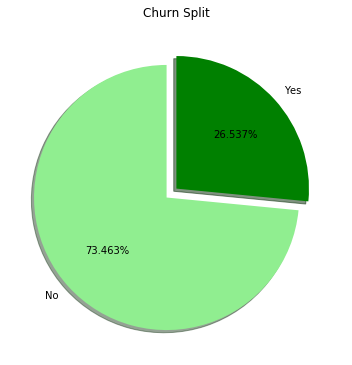

In [9]:
from collections import Counter

labels, values = zip(*Counter(telco["Churn"]).items())
colors = ['lightgreen', 'green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[5, 5])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.3f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

### Data Cleaning ###

In [10]:
df = telco.drop(['customerID','TotalCharges'],axis=1)
df = df.apply(LabelEncoder().fit_transform)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,1


### Data Preprocessing, & Feature Importance ###

In [0]:
#Spliting df to features data and target data
X = df.iloc[:,:-1]
X1 = df[['tenure','InternetService','PhoneService']]
y = df[["Churn"]]

In [0]:
#Spliting of Training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y,test_size=0.1,random_state=42)

In [0]:
#scaling the data
scaler = StandardScaler()
SS_X_train = scaler.fit_transform(X_train)
SS_X_test = scaler.fit_transform(X_test)
SS_X1_train = scaler.fit_transform(X1_train)
SS_X1_test = scaler.fit_transform(X1_test)

### Training of the model with the help of CART(Gini Index) Algorithm

In [18]:
# accuracy in different level for gini index
list_accuracy = []
for i in range(1,25):
  rfc_g_l = RandomForestClassifier(criterion='gini',max_depth=i,n_estimators=200)
  rfc_g_l.fit(SS_X_train,y_train)
  predictions_l = rfc_g_l.predict(SS_X_test)
  acc_gini_l = accuracy_score(y_test,predictions_l)*100
  list_accuracy.append(acc_gini_l)
  print("Accuracy: {} % for depth= {}".format(acc_gini_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 72.4822695035461 % for depth= 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 75.74468085106383 % for depth= 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 78.58156028368795 % for depth= 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.42553191489363 % for depth= 4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.13475177304964 % for depth= 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.13475177304964 % for depth= 6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.27659574468085 % for depth= 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.56737588652483 % for depth= 8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.42553191489363 % for depth= 9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.28368794326242 % for depth= 10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.42553191489363 % for depth= 11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.56028368794325 % for depth= 12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.70921985815603 % for depth= 13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.13475177304964 % for depth= 14


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.0 % for depth= 15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.85106382978722 % for depth= 16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.56737588652483 % for depth= 17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.1418439716312 % for depth= 18


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.43262411347519 % for depth= 19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.71631205673759 % for depth= 20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.8581560283688 % for depth= 21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.85106382978722 % for depth= 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.1418439716312 % for depth= 23


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.57446808510639 % for depth= 24

Maximum Accuracy is 81.56028368794325 % for depth= 12


In [20]:
# accuracy in different level for gini index
list_accuracy = []
for i in range(1,25):
  rfc_g_l = RandomForestClassifier(criterion='gini',max_depth=i,n_estimators=200)
  rfc_g_l.fit(SS_X1_train,y1_train)
  predictions_l = rfc_g_l.predict(SS_X1_test)
  acc_gini_l = accuracy_score(y1_test,predictions_l)*100
  list_accuracy.append(acc_gini_l)
  print("Accuracy: {} % for depth= {}".format(acc_gini_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 72.4822695035461 % for depth= 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 72.4822695035461 % for depth= 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 77.58865248226951 % for depth= 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.13475177304964 % for depth= 4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.27659574468085 % for depth= 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.84397163120568 % for depth= 9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.99290780141844 % for depth= 10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.98581560283688 % for depth= 14


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 18


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.13475177304964 % for depth= 19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 23


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.98581560283688 % for depth= 24

Maximum Accuracy is 82.26950354609929 % for depth= 11


In [21]:
rfc_g = RandomForestClassifier(criterion='gini',max_depth=8,n_estimators=200)
rfc_g.fit(SS_X_train,y_train)
predictions = rfc_g.predict(SS_X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [22]:
important_gini = rfc_g.feature_importances_
important_f_gini = pd.Series(important_gini, X.columns[:])
important_f_gini.sort_values(ascending=False, inplace=True)
important_f_gini

tenure              0.214814
Contract            0.204237
MonthlyCharges      0.124612
OnlineSecurity      0.104858
TechSupport         0.082210
InternetService     0.048077
PaymentMethod       0.043226
OnlineBackup        0.037407
DeviceProtection    0.023184
PaperlessBilling    0.022444
MultipleLines       0.015552
SeniorCitizen       0.014351
StreamingTV         0.013073
StreamingMovies     0.012771
Partner             0.011505
gender              0.011243
Dependents          0.010972
PhoneService        0.005465
dtype: float64

In [23]:
cla_gini = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_gini)

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.92      0.87       511
           1       0.70      0.51      0.59       194

    accuracy                           0.81       705
   macro avg       0.77      0.71      0.73       705
weighted avg       0.80      0.81      0.80       705



In [24]:
con_gini = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_gini)

Confusion matrix:

 [[469  42]
 [ 95  99]]


In [25]:
acc_gini = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_gini,"%")

Accuracy: 80.56737588652483 %


### Training of the model with the help of ID3(Entropy) Algorithm

In [26]:
# accuracy in different level for entropy
list_accuracy = []
for i in range(1,25):
  rfc_e_l = RandomForestClassifier(criterion='entropy',max_depth=i,n_estimators=200)
  rfc_e_l.fit(SS_X_train,y_train)
  predictions_l = rfc_e_l.predict(SS_X_test)
  acc_entropy_l = accuracy_score(y_test,predictions_l)*100
  list_accuracy.append(acc_entropy_l)
  print("Accuracy: {} % for depth= {}".format(acc_entropy_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 72.4822695035461 % for depth= 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 72.62411347517731 % for depth= 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 78.86524822695036 % for depth= 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.0 % for depth= 4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.85106382978722 % for depth= 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.27659574468085 % for depth= 6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.99290780141844 % for depth= 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.70921985815603 % for depth= 8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.27659574468085 % for depth= 9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.85106382978722 % for depth= 10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.42553191489363 % for depth= 11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.1418439716312 % for depth= 12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.70921985815603 % for depth= 13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.1418439716312 % for depth= 14


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.56737588652483 % for depth= 15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.8581560283688 % for depth= 16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.1418439716312 % for depth= 17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.57446808510639 % for depth= 18


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.28368794326242 % for depth= 19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.42553191489363 % for depth= 20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.71631205673759 % for depth= 21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.70921985815603 % for depth= 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.43262411347519 % for depth= 23


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.0 % for depth= 24

Maximum Accuracy is 81.27659574468085 % for depth= 6


In [27]:
list_accuracy = []
for i in range(1,25):
  rfc_e_l = RandomForestClassifier(criterion='entropy',max_depth=i,n_estimators=200)
  rfc_e_l.fit(SS_X1_train,y1_train)
  predictions_l = rfc_e_l.predict(SS_X1_test)
  acc_entropy_l = accuracy_score(y1_test,predictions_l)*100
  list_accuracy.append(acc_entropy_l)
  print("Accuracy: {} % for depth= {}".format(acc_entropy_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 72.4822695035461 % for depth= 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 72.4822695035461 % for depth= 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 77.58865248226951 % for depth= 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.70921985815603 % for depth= 4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.13475177304964 % for depth= 10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 14


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 18


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.41843971631205 % for depth= 23


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 82.26950354609929 % for depth= 24

Maximum Accuracy is 82.26950354609929 % for depth= 13


In [28]:
rfc_e = RandomForestClassifier(criterion='entropy',max_depth=6,n_estimators=200)
rfc_e.fit(SS_X_train,y_train)
predictions = rfc_e.predict(SS_X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [29]:
important_entropy = rfc_e.feature_importances_
important_f_entropy = pd.Series(important_entropy, X.columns[:])
important_f_entropy.sort_values(ascending=False, inplace=True)
important_f_entropy

Contract            0.277075
tenure              0.187756
OnlineSecurity      0.105151
TechSupport         0.102718
MonthlyCharges      0.095754
InternetService     0.061373
OnlineBackup        0.035370
PaymentMethod       0.031399
DeviceProtection    0.026610
PaperlessBilling    0.017970
StreamingMovies     0.011499
StreamingTV         0.008887
MultipleLines       0.008781
SeniorCitizen       0.008664
Dependents          0.007192
Partner             0.006332
PhoneService        0.003811
gender              0.003657
dtype: float64

In [30]:
cla_entropy = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_entropy)

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.93      0.88       511
           1       0.72      0.49      0.59       194

    accuracy                           0.81       705
   macro avg       0.78      0.71      0.73       705
weighted avg       0.80      0.81      0.80       705



In [31]:
con_entropy = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_entropy)

Confusion matrix:

 [[474  37]
 [ 98  96]]


In [32]:
acc_entropy = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_entropy,"%")

Accuracy: 80.85106382978722 %
